<a href="https://colab.research.google.com/github/Swastik02aug/Mobile-price-range-prediction/blob/main/Mobile_Price_Range_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Pridiction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**          -Swastik Chaurasia


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices .The objective is to find out some relation between features of a mobile phone (eg:-RAM,INTERNAL MEMORY ,etc) and its selling price .In this problem ,we do not have to predict the actual price but a price range indicating how  high  the price is.**


Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                          #importing for Numerical computations
import pandas as pd                                         #importing Data manipulations
import matplotlib.pyplot as plt                             #importing for visualize with plots
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier         #importing random forest classifier
from sklearn.neighbors import KNeighborsClassifier          #Import KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier             #importing decision tree classifier
from sklearn.pipeline import make_pipeline                  #importing make_pipeline for constructing pipelines
from sklearn.preprocessing import StandardScaler            #importing  for Scaling data
from sklearn.ensemble import StackingClassifier             #importing Stacking Classifier
from sklearn.impute import SimpleImputer                    #importing for treating  missing values
from sklearn.model_selection import cross_val_score         #importing  for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV            #importing to find the best values for hyperparameters of a model
from sklearn.model_selection import train_test_split        # split train and test data

import warnings
warnings.filterwarnings("ignore")                           #importing disable some warnings

### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading csv file
df=pd.read_csv('/content/drive/MyDrive/classification ml project/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()
#Return the first 5 rows of the DataFrame

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
#return the (number of rows,number of columns)

There are 2000 rows and 21 columns in the given data sets.

### Dataset Information

In [ ]:
# Dataset Info
df.info()
#it is used to provides details about each columns .

From the above we find that there no null values present in the given data set and only two types of data are present i.e;integers and float.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value 
df.duplicated()
# it is uesd to return the boolean output such as True for duplicated values otherwise False


In [ ]:
# here we fining out the lenght of the duplicate values 
len(df[df.duplicated()])

Hence there is no duplicate values present in the given data set.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()
#it is used to return the number of sum of all missing values in the columns of the given data set.

There is no null values  found in any columns of the given data sets.


### What did you know about your dataset?

From the given data set we find that there is no duplicated as well as no missing values present in the given data set .And there are only two types of data set are present i.e; integers and float.There are 2000 rows and 21 columns in the dataframe.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
c=list(df.columns)
c

In [ ]:
# Dataset Describe
df.describe(include='all')
# it is used to provides the no. of element present in every columns,mean,standard deviation,minimum,maximum  and etc 

From the above we find that minimum value of px_height and sc_w cannot be zero ,which can't be so we need to handle that .

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()
# it is used to print the number of unique values in each columns of the data set.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.head()

In [ ]:
binary_features = ['blue', 'four_g', 'three_g','dual_sim','touch_screen','wifi']
normal_feature=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','talk_time','price_range' ]  


    


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
c=df[normal_feature]

In [ ]:
# here we finding out the distributions of the factors which affects the price
# Plot of binary features against price range

for col in normal_feature:
  fig, axs = plt.subplots(1,2, figsize=(15,5))
  sns.kdeplot(data=df, x=col, hue='price_range', ax=axs[0])
  sns.boxplot(data=df, x='price_range', y=col, ax=axs[1])
  plt.show()



##### 1. Why did you pick the specific chart?

distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

from the given data we find that data distibution is not normal .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To make it normal distribution we aplly log transformation

#### Chart - 2

In [ ]:
# scatter plot to see the relationship between dependent & independent variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,10))
  ax = fig.gca()

  plt.scatter(df[col], df['price_range'], color = '#88c999')
  plt.xlabel(col)
  plt.ylabel('price_range')
  ax.set_title('{} vs price_range'.format(col))

  z = np.polyfit(df[col],df['price_range'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "g--", lw=2)
  plt.grid()

  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor=df.corr()
sns.heatmap(abs(cor), annot = True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
#checking for outliers

plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#finding out no. of px_height and sc_w which cannot be zero
a=len(df[df.px_height==0])
b=len(df[df.sc_w==0])
print('no. pixel height equal to zero:',a)
print('no. screen width equal to zero:',b)

#assigning the new value (mean value) to the zero.
mean1=df.px_height.mean()
mean2=df.sc_w.mean()
df['sc_w'][df[df.sc_w == 0].index] = mean1
df['px_height'][df[df.px_height == 0].index] = mean2

#### What all missing value imputation techniques have you used and why did you use those techniques?

From the above we find that minimum value of px_height(pixel height ) and sc_w(screen width) cannot be zero ,which can't be so we need to handle that . so we have to remove those zeroes with mean .

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments



##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
#no need

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

In [ ]:
df.head(10)

### 4. Feature Manipulation & Selection

In [ ]:
# no need

#### 1. Feature Manipulation

In [ ]:
from matplotlib.axes import BarContainer
# Manipulate Features to minimize feature correlation and create new features
#screen size is equal to the diagonal of the screen in inches
#1 cm =.393 inches
#diagonal=sqrt((df.sc_h*.393)^2+(df.sc_w*.393)^2)
#df['screen_size']=(df.sc_h*df.sc_w)
#df.head()
import math as m
sc_h_i=.393*df.sc_h
sc_w_i=.393*df.sc_w
a=sc_h_i**2
b=sc_w_i**2
c=a+b

df['screen_size']=(np.sqrt(c))
df.drop(df.sc_h, axis=0,inplace=True)
df.drop(df.sc_w, axis=0,inplace=True)




In [ ]:
df.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# no need

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [ ]:
# there are some variale which do play major role in pridecting the price of the mobile (blue,dual_sim,m_dep).
df.columns

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
df.columns

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# choose appropriate dependent and independent variables
y = df.dropna().price_range
X = df.dropna().drop(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'screen_size'], axis=1)

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

In [ ]:
#no need

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


In [ ]:

# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [ ]:

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
#Random Forest


from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

In [ ]:

print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:

feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

In [ ]:
#Hyperparameter tuning for Random Forest


from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

In [ ]:

clsr.best_params_

In [ ]:

clsr.best_estimator_

In [ ]:


clsr.best_score_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

In [ ]:

y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)
     

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

In [ ]:

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model


# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

In [ ]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:

# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

In [ ]:

# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)
     

In [ ]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

In [ ]:

# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)
     

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)
     

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Conclusion

From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
half the devices have Bluetooth, and half don’t
there is a gradual increase in battery as the price range increases
Ram has continuous increase with price range while moving from Low cost to Very high cost
costly phones are lighter
RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

ONTENTS :
Project Overview
Data description
Notebooks
Applyed Models
The Process of work
compare Model score
Project Overview
The goal of this project is to develop classification model for dataset that hold specifications of 2000 mobile phones attempt to predict best price ranges by applying various machine learning algorithm.

Data description :
battery_power: Total energy a battery can store in mAh
blue: Has bluetooth or not
clock_speed: Speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Megabytes
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: Longest time that battery will last by a call
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
Notebooks:
Included in this github are a jupyter notebooks folder containing:

EDA_Mobile_Price_Classification.ipynb :

A notebook where I performed significant EDA to explore the variables.
Mobile_Price_Classification_ML.ipynb :

I began with baseline models and continued through random forest, K nearest neighbor, Decision tree , and finally Stacking models.
Applyed Models :
RandomForestClassifier
Decision Tree Classifier
KNeighbors Classifier
StackingClassifier
The Process of work :
1. Exploratory Data Analysis
find if there is duplicated and null value and clean it.
visualize data and check if there is outlier.
the dataset is clear from null and duplicated values and the outlier looking normal
The first thing I did was take a look at the relationship between the feature
image


Here is the amount of each catogrical feature
image




Here we can see the amount of each catogrical feature with low cost 0
image


Here we can see the amount of each catogrical feature with medium cost 1
image




Here we can see the amount of each catogrical feature with high cost 2
image




Here we can see the amount of each catogrical feature with very high cost 3
image

Here I use pie to know the amount of the phones that support wifi , buetooth
image




Here I use pie to knowthe amount of the phones that support 3G , 4G
image




Here I use pie to know the amount of the phones that support dual sim , tuoch screen
image




Observations:
we obtain that we had the sam amount of praice range over the data
the data include old speicification
RAM has biggest effict on price * In 0 (low cost) Ram values are changing between 0- 2000 megabytes * In 1 (medium cost) Ram values are changing between 0-3000 megabytes * In 2 (high cost) Ram values are changing between 1000-4000 mb * In 3 (very high cost) Ram values are changing between 2000 and 4000 mb( mostly 3500-4000 mb)



2. Split the data to X & y for train the models.
X fot all feature withot price_range
y for target (price_range)

3. Defined Baseline model
to make sure the model that we will use is appropriate for the problem

4. defined classification model
Random forest model (rf)
K nearest neighbor model (knn)
Decision tree model (dt)

5. valuate model using cross validation.
Why do we need cross validation in machine learning ? Cross-validation is primarily used to estimate the skill of a machine learning model on unseen data.That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


6. define stack model.
Stacking, also known as stacked generalization, is an ensemble method where the models are combined using another machine learning algorithm



7.valuate model using cross validation.



8. optimize the best model using grid search.
Grid search is essentially an optimization algorithm which lets you select the best parameters for your optimization problem from a list of parameter options that you provide, hence automating the 'trial-and-error' method.



10. split the data using train_test_split from scikitlearn and apply the best model



compare Model score
image

Note :
Random forest model (rf)
K nearest neighbor model (knn)
Decision tree model (dt)
Stacking model (staked)
Stacking model after optimizing (grid)


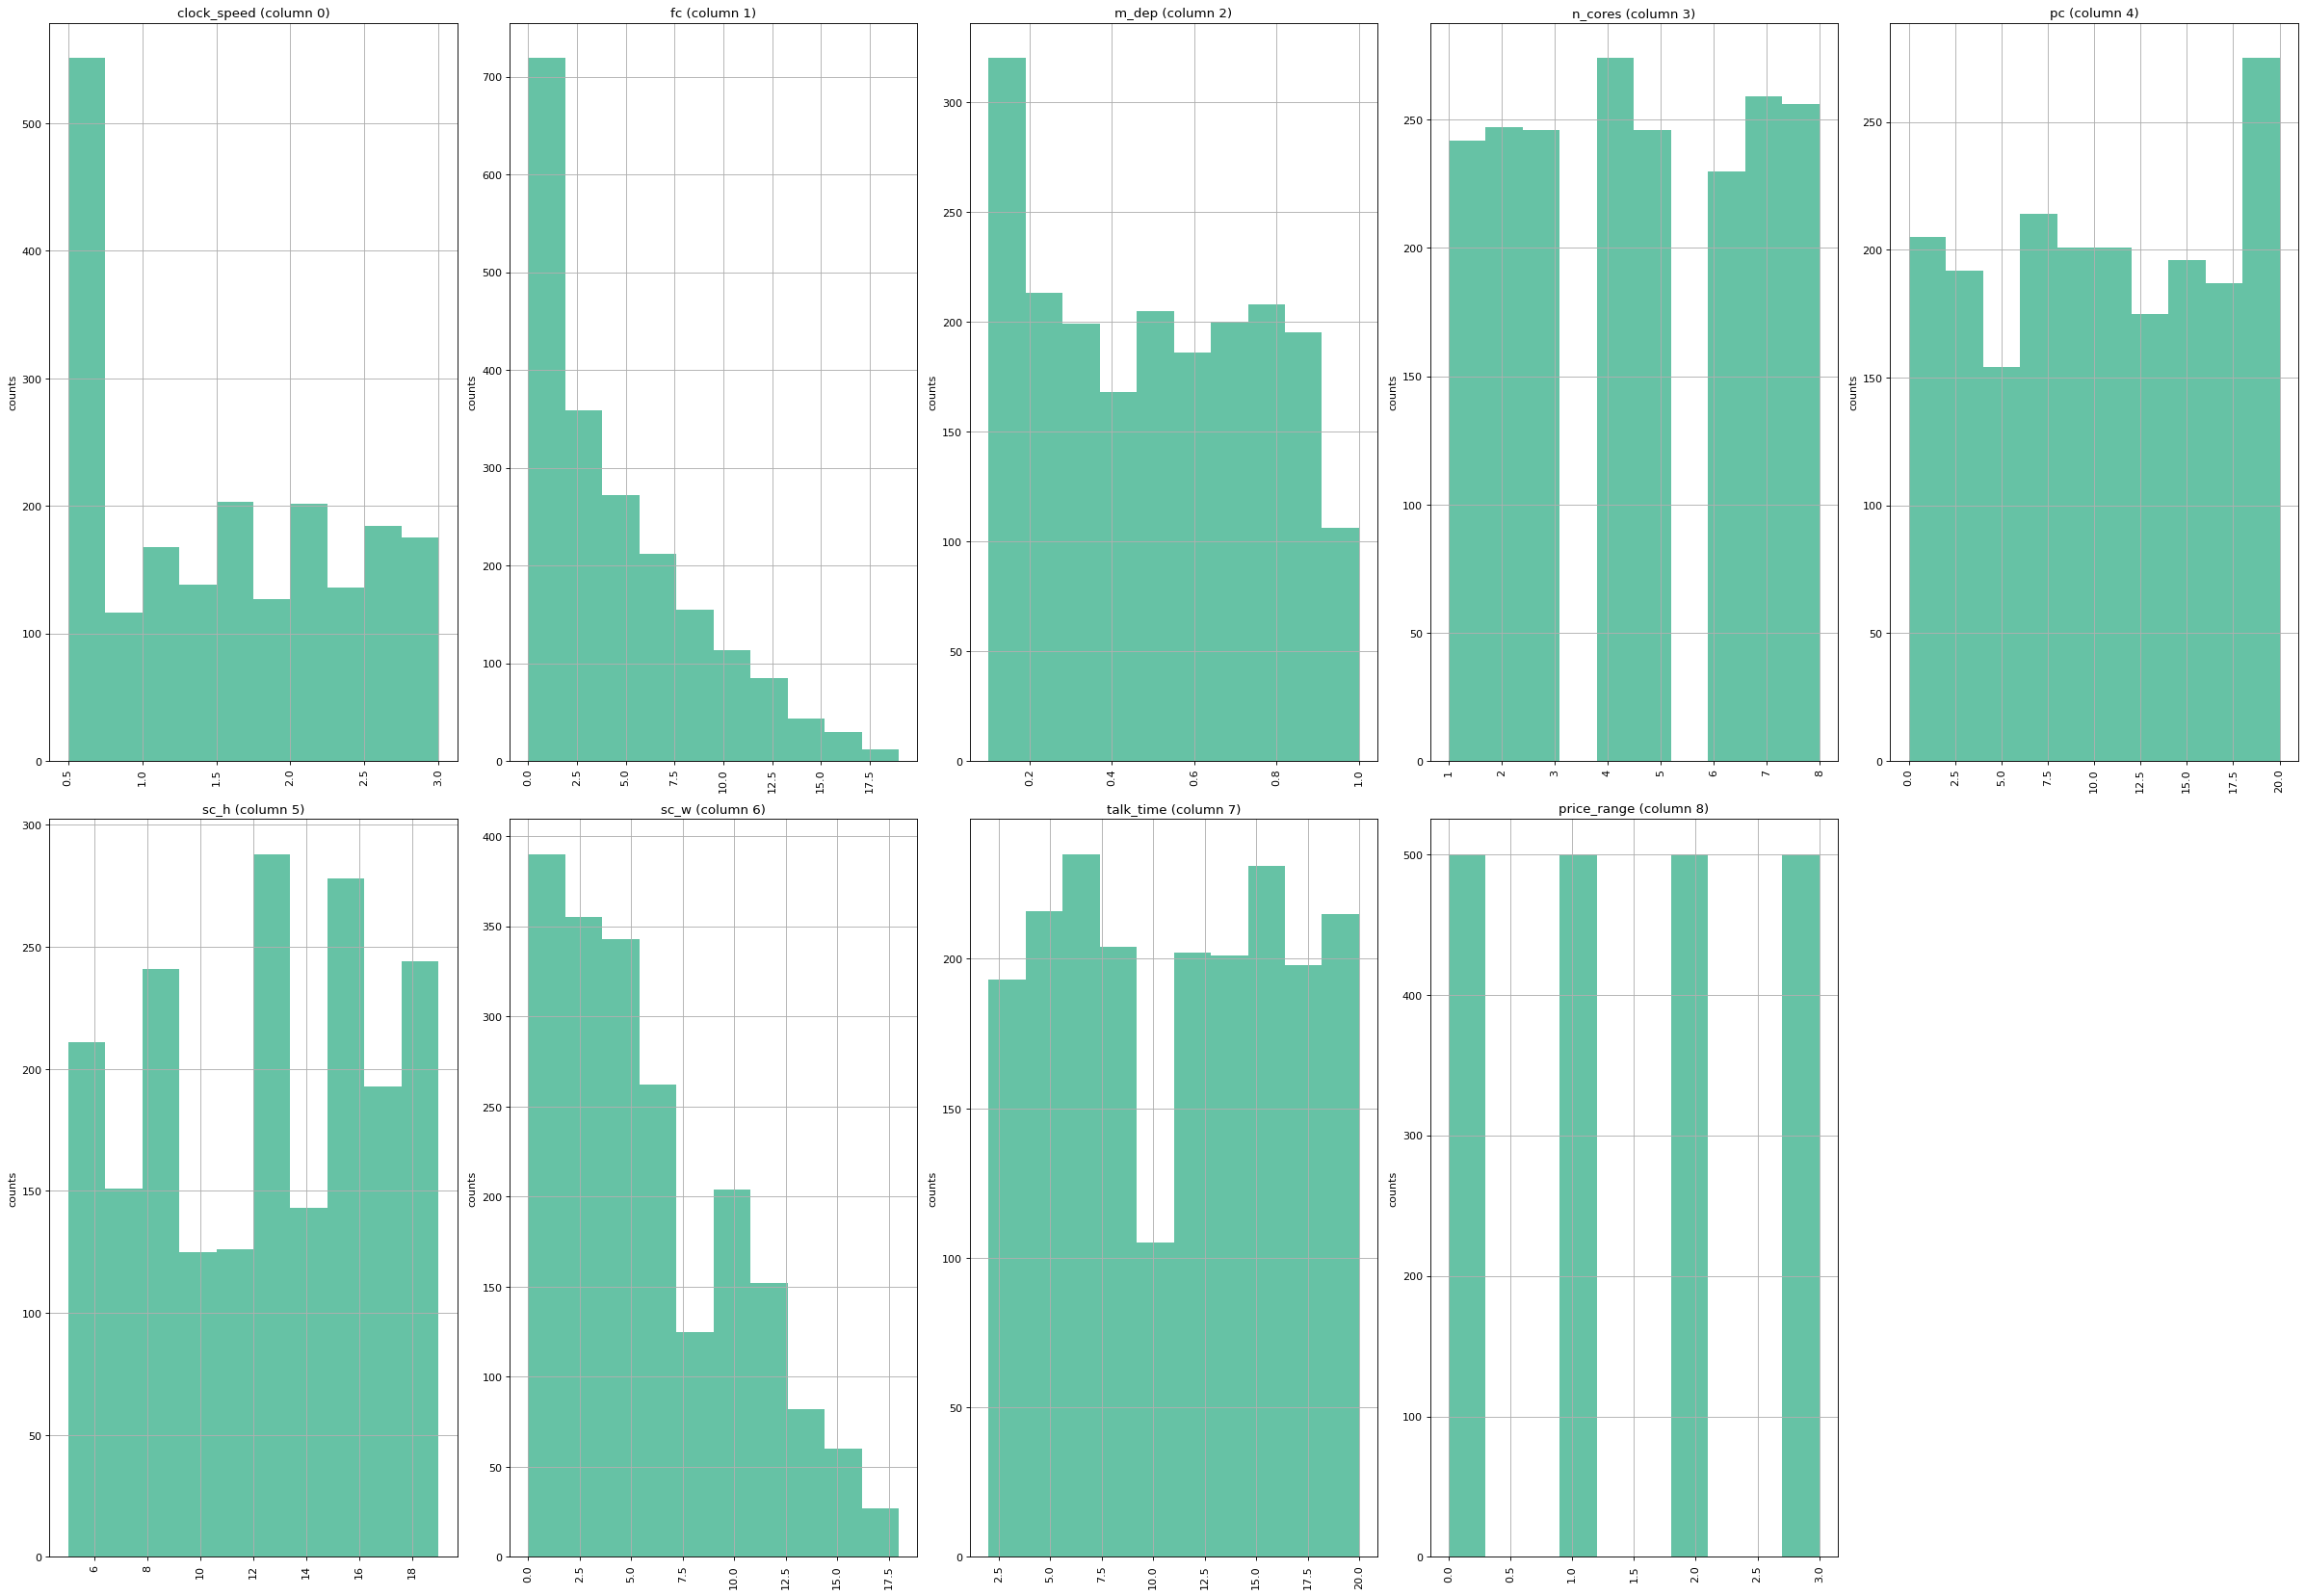

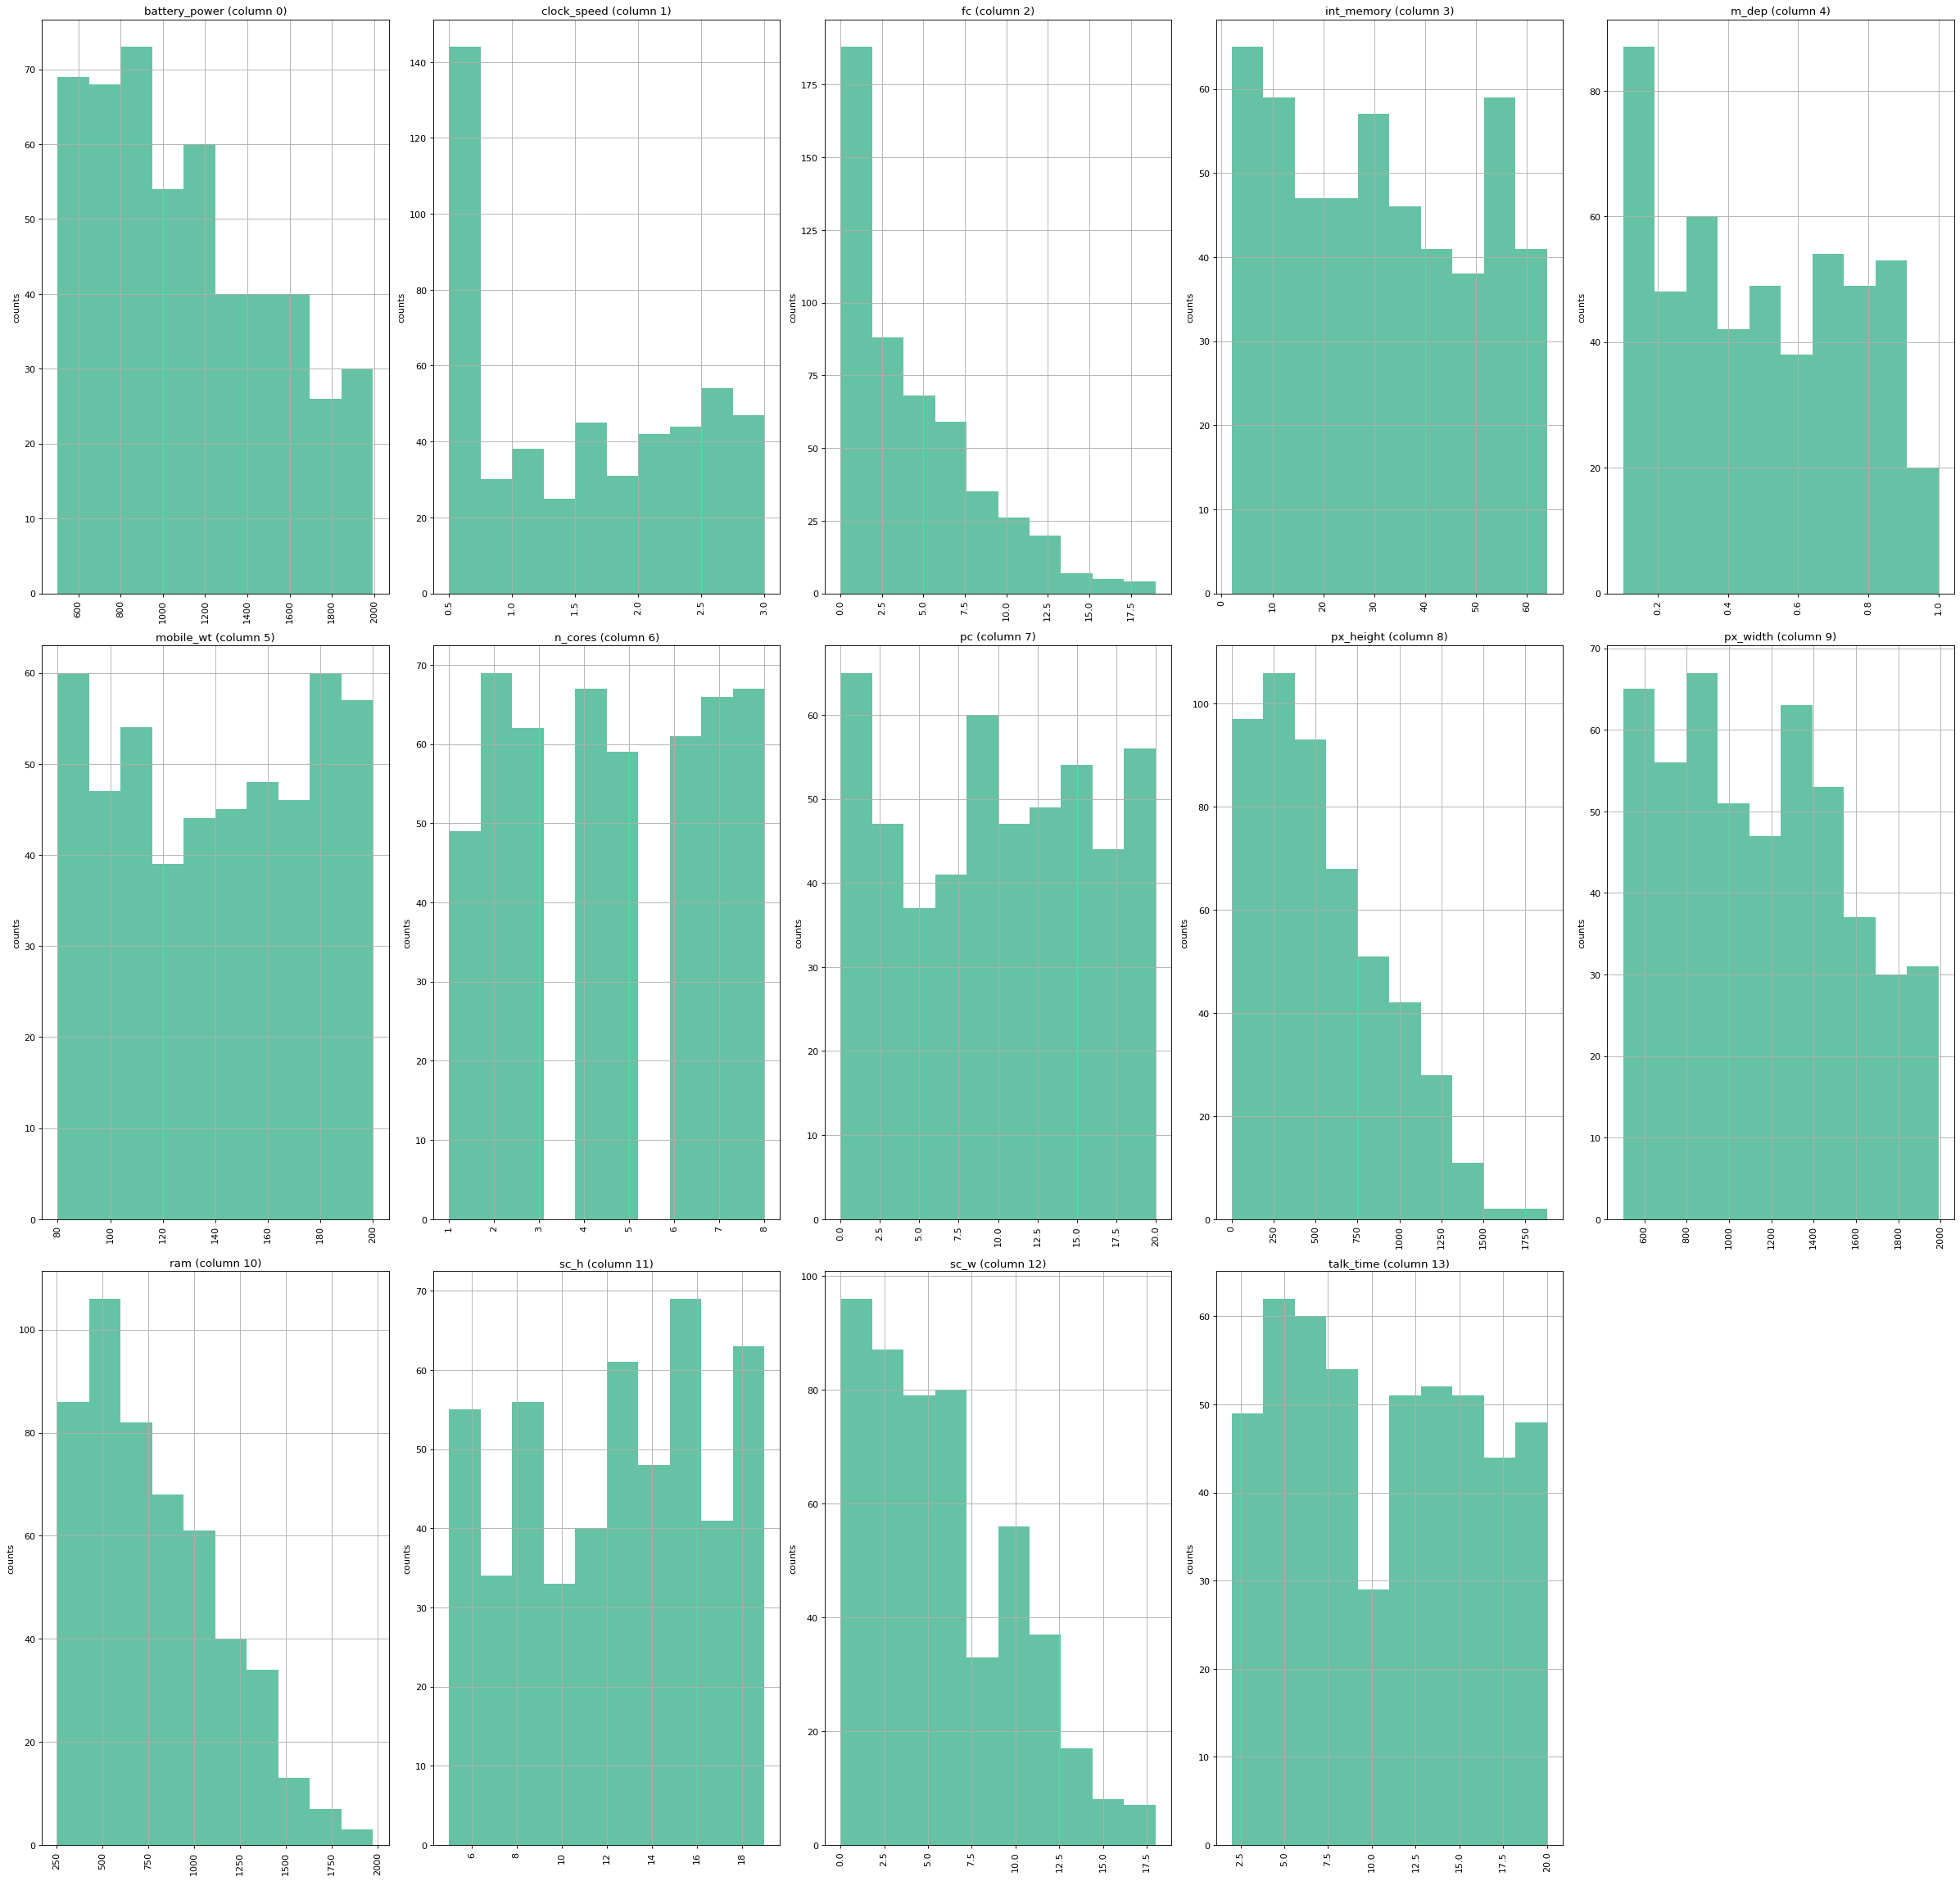

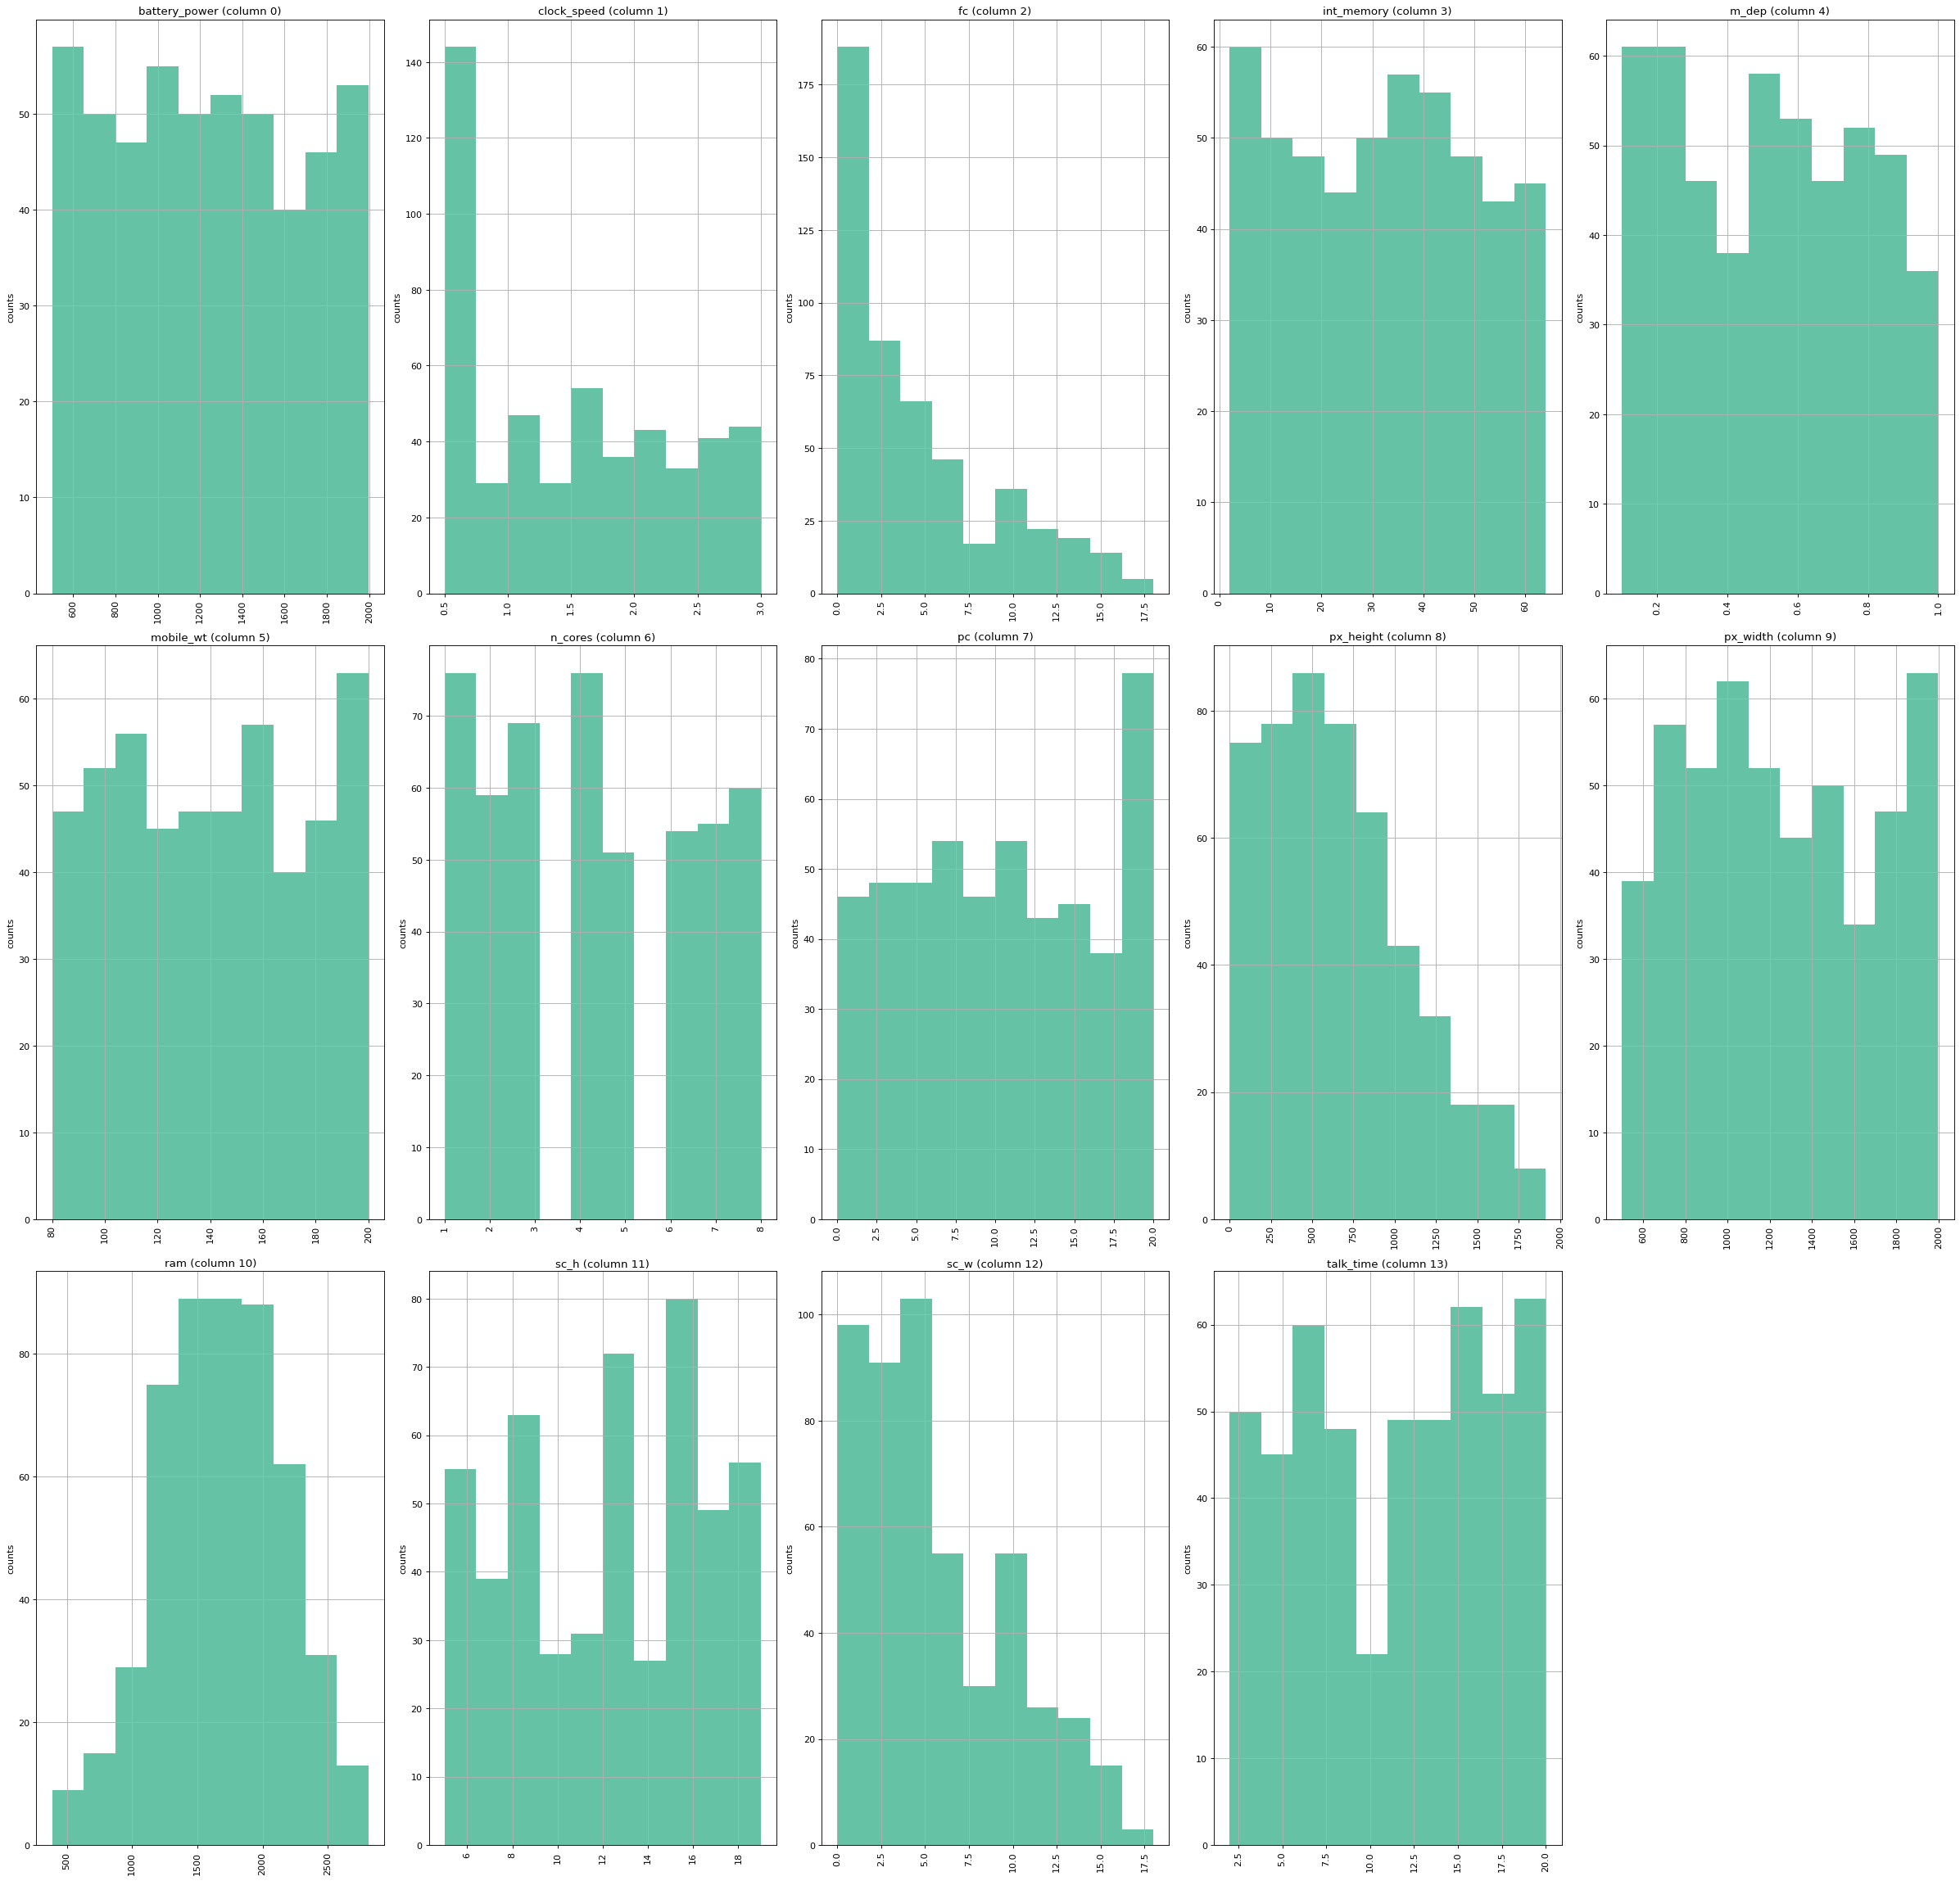

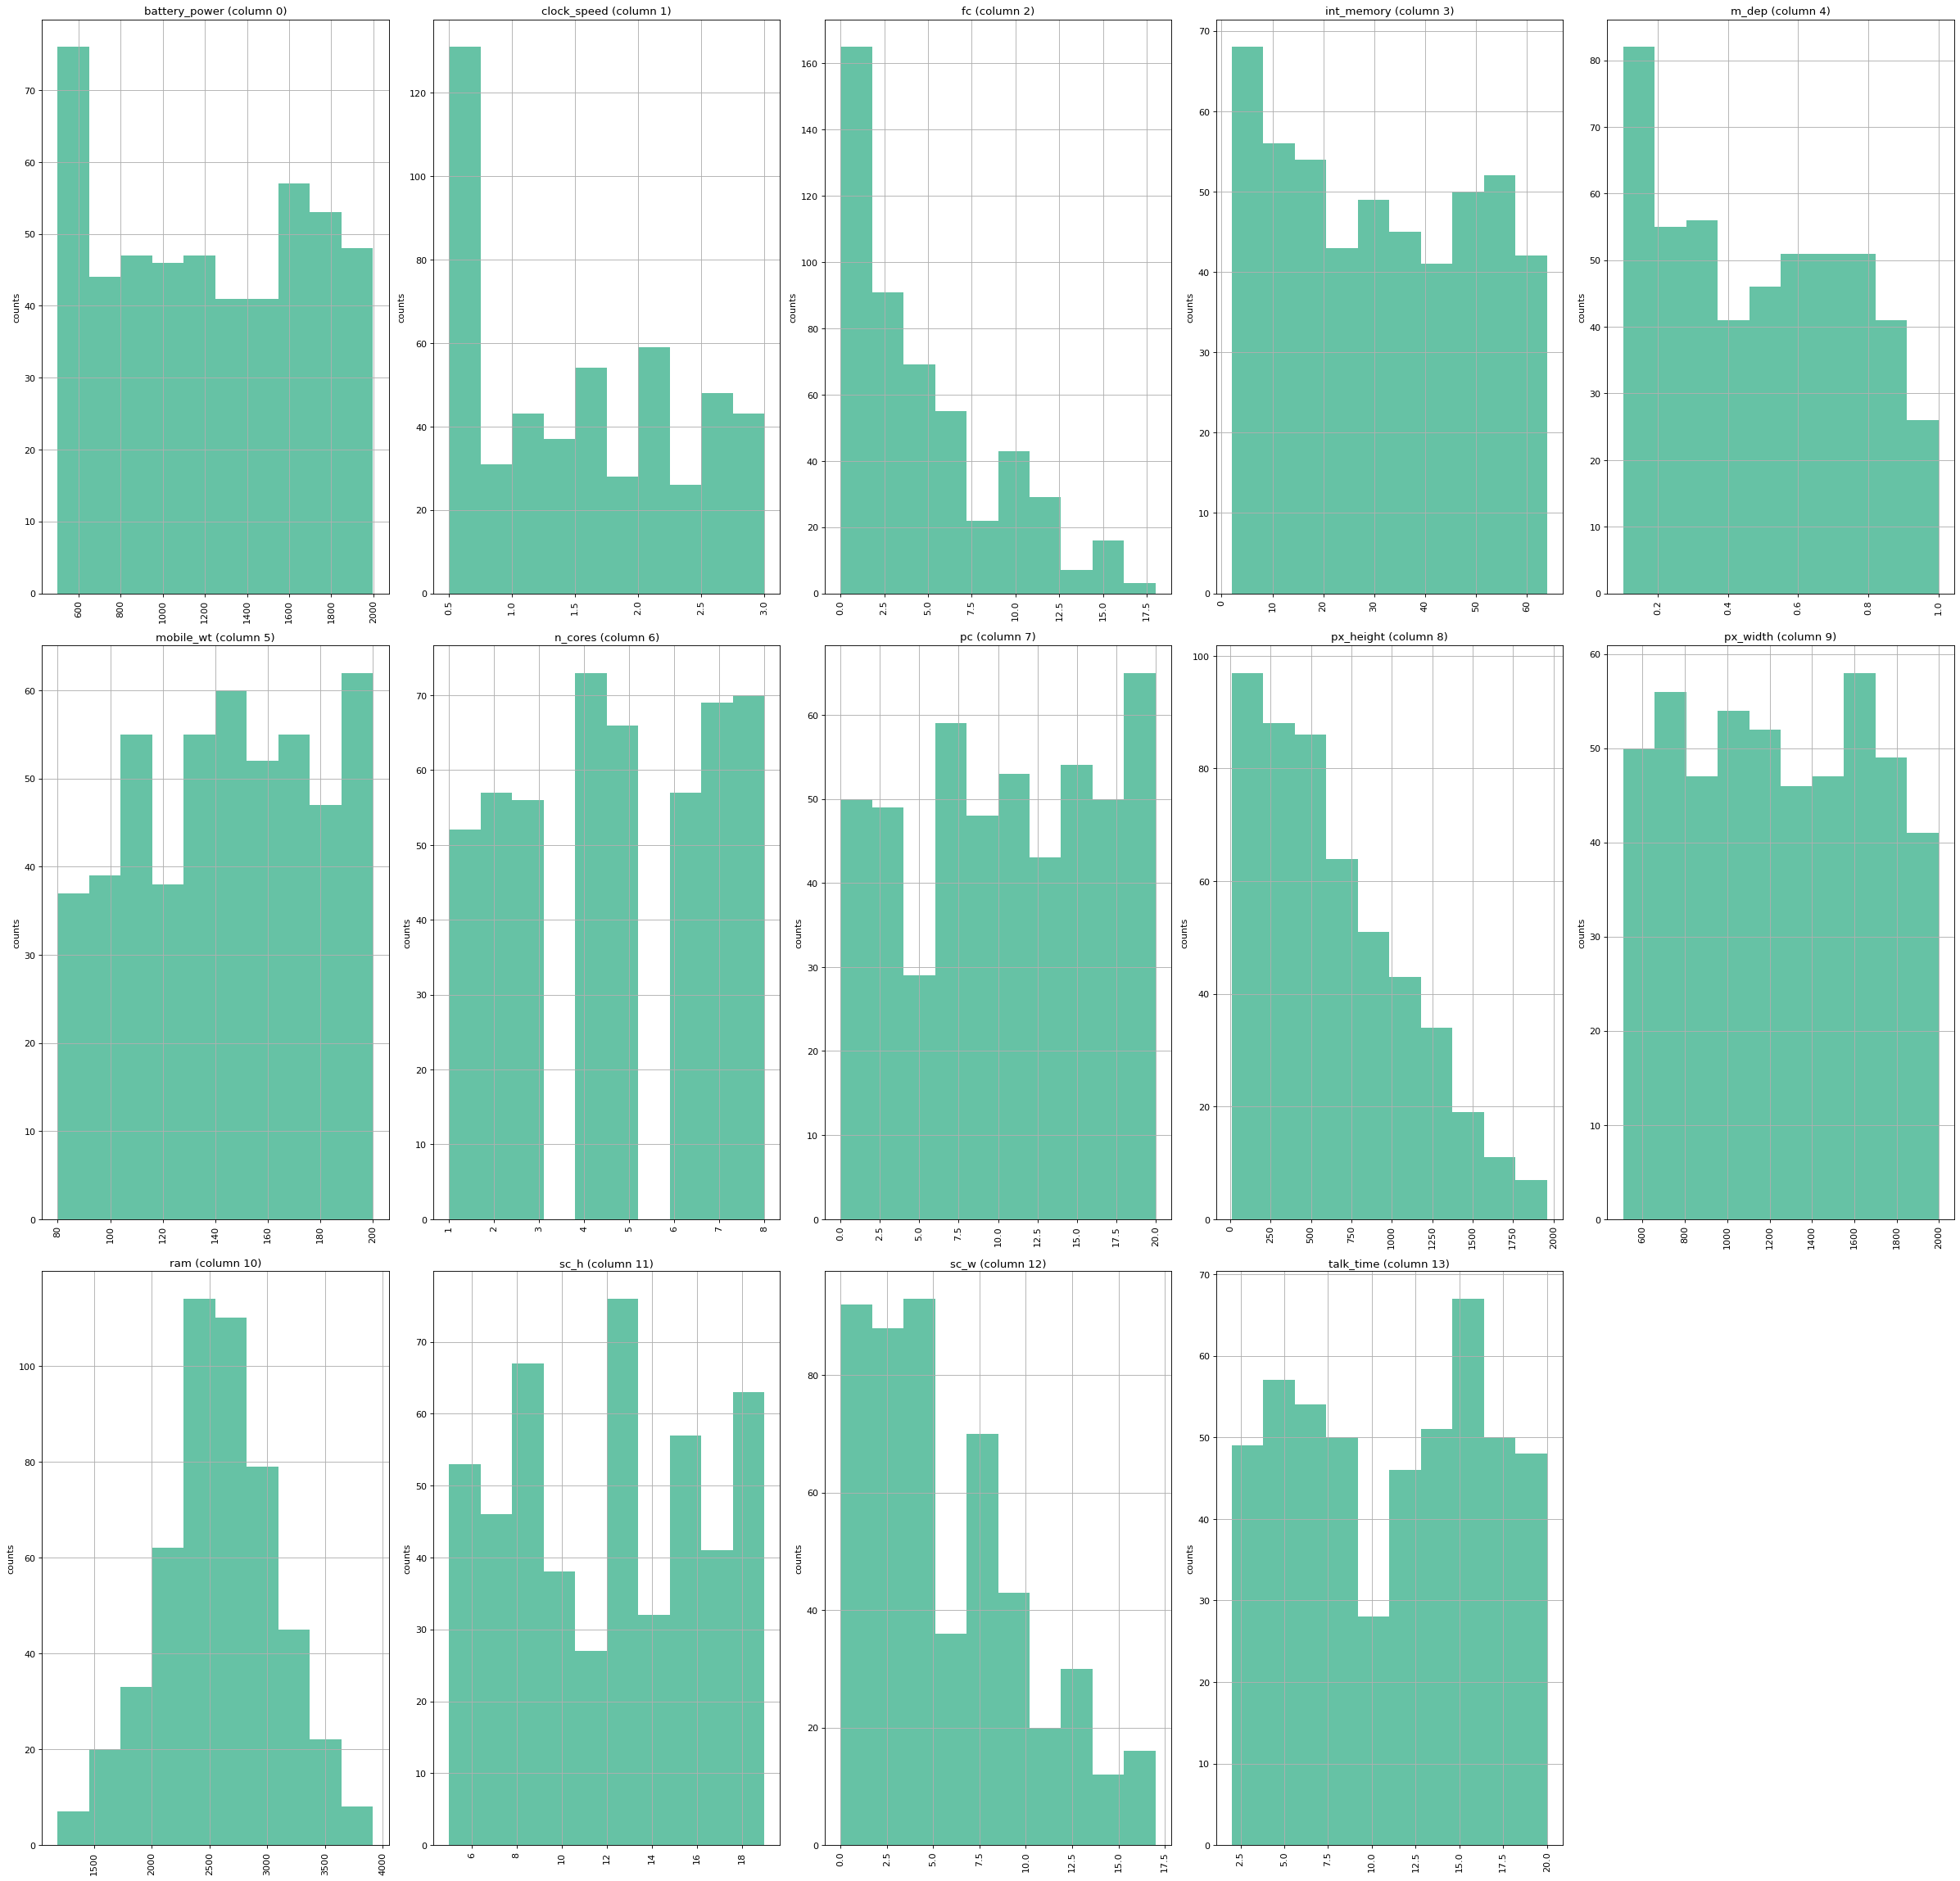

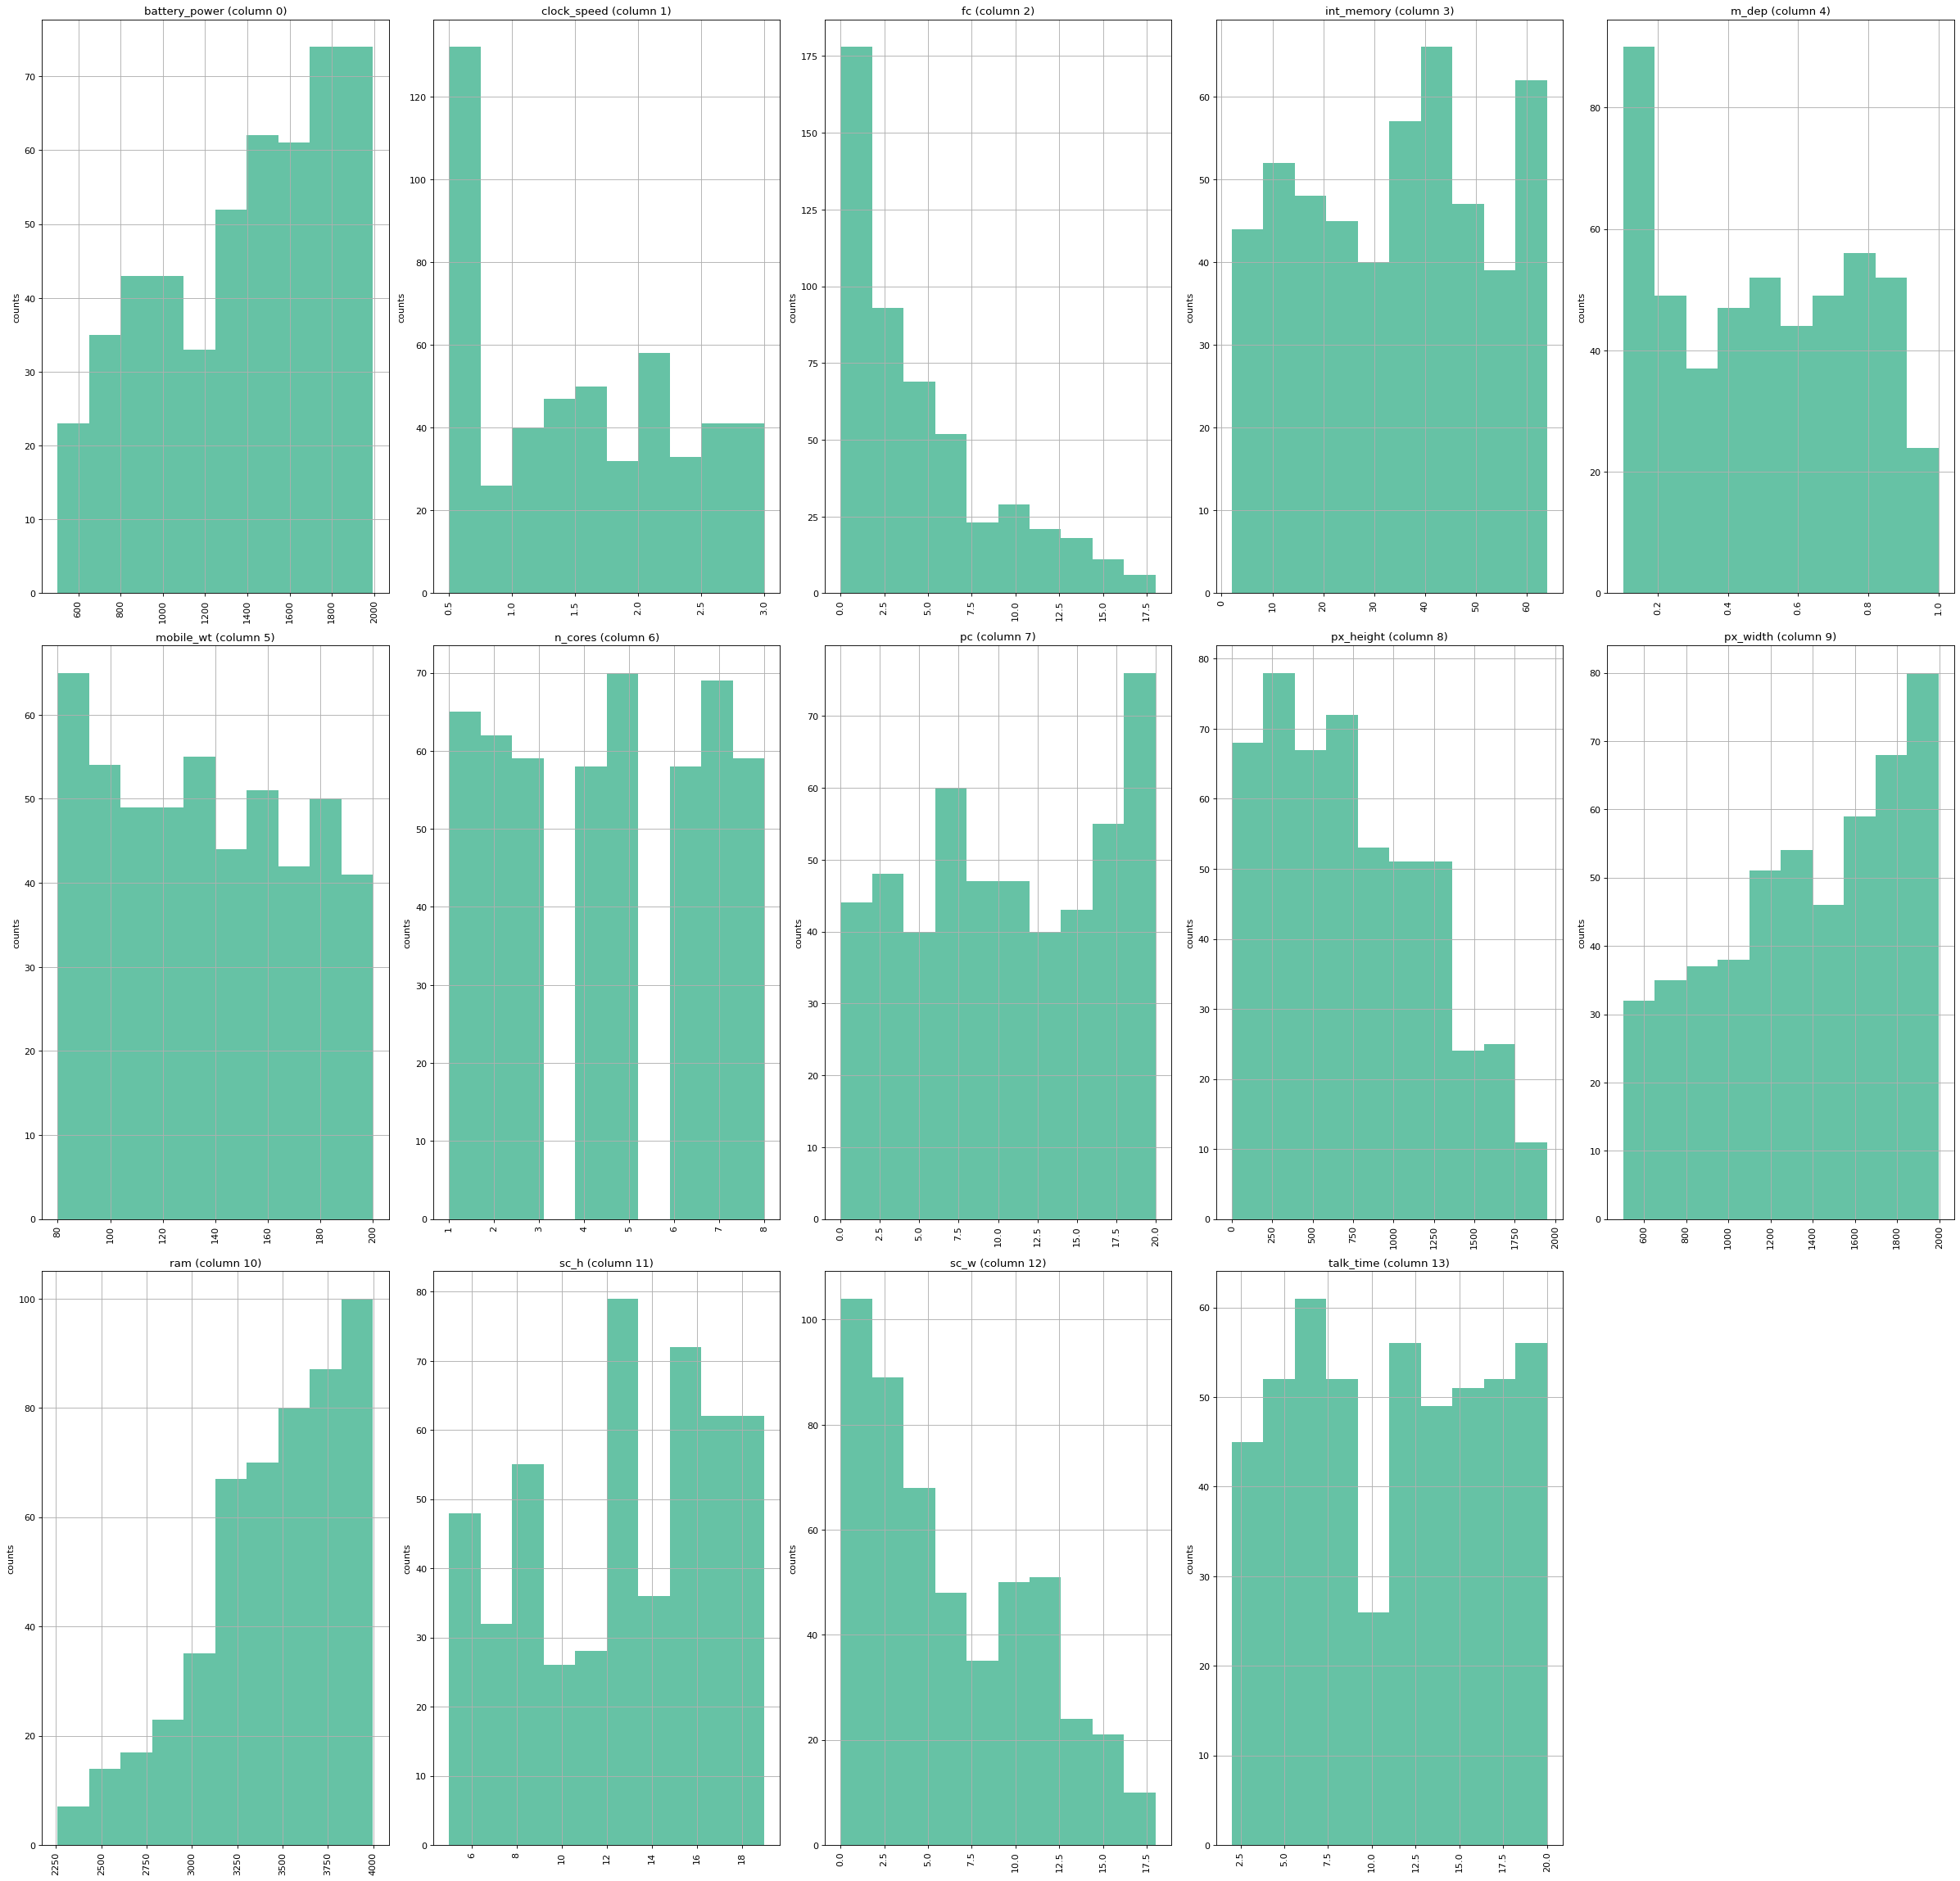

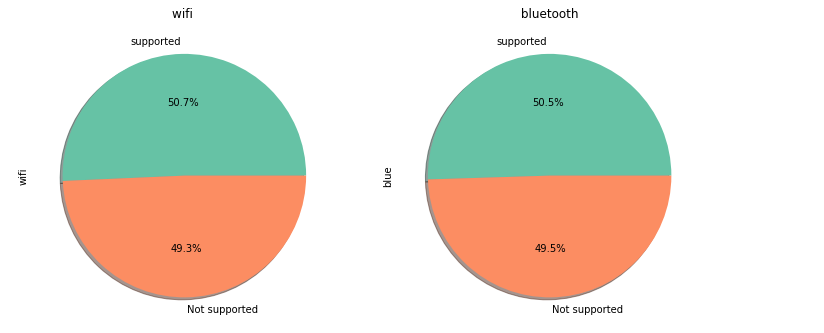

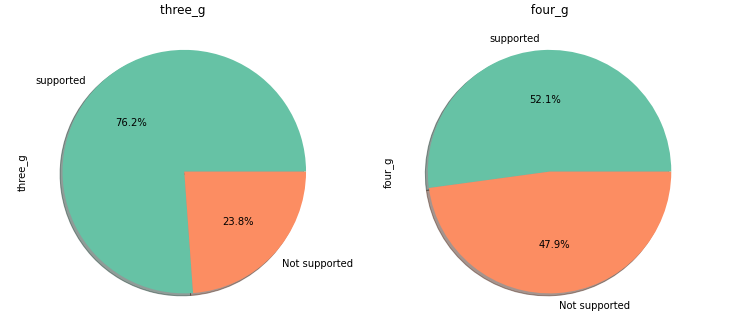

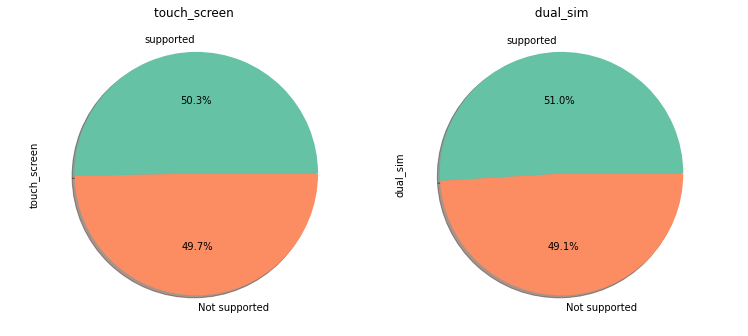